# Loading and visualizing data from a NetCDF file 

In this notebook, we will use [Xarray](https://foundations.projectpythia.org/core/xarray/xarray-intro.html#opening-netcdf-data) to open up the NetCDF file

Start by import the necessary packages. 

- [cartopy](https://scitools.org.uk/cartopy/docs/latest/): for maps
- [cmocean](https://matplotlib.org/cmocean/): pretty(!) colormaps for common variables in oceanography
- [numpy](https://numpy.org/doc/): n-dimensional arrays in python
- [pandas](https://pandas.pydata.org/docs/): data frames in python. We will be using the `datetime` functionality (specifically [`to_timedelta`](https://pandas.pydata.org/docs/reference/api/pandas.to_timedelta.html)). 
- [xarray](https://docs.xarray.dev/): for loading and managing multi-dimensional data

In [1]:
import cartopy.crs as ccrs
import cmocean
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

## Load the data

Define the path to the data. Note that I downloaded the data from: https://cproof.uvic.ca/gliderdata/deployments/dfo-bb046/dfo-bb046-20201006/ and put it in a local `data` directory

In [2]:
filepath = "./data/dfo-bb046-20201006.nc"

We will use Xarray to load the dataset into an object called `ds`. Note that Xarray has a nice way to display what is in the NetCDF file. Running the next cell opens that data set and provides you with a nice viewer that shows you the coordinates and variables that you have access to. 

In [3]:
ds = xr.open_dataset(filepath)
ds

<xarray.Dataset>
Dimensions:                (time: 63306)
Coordinates:
  * time                   (time) datetime64[ns] 2020-10-06T22:11:54.60099993...
    latitude               (time) float64 ...
    longitude              (time) float64 ...
    depth                  (time) float64 ...
Data variables: (12/18)
    heading                (time) float64 ...
    pitch                  (time) float64 ...
    roll                   (time) float64 ...
    conductivity           (time) float64 ...
    temperature            (time) float64 ...
    pressure               (time) float64 ...
    ...                     ...
    profile_index          (time) float64 ...
    profile_direction      (time) float64 ...
    salinity               (time) float64 ...
    potential_density      (time) float64 ...
    density                (time) float64 ...
    potential_temperature  (time) float64 ...
Attributes: (12/64)
    Conventions:               CF-1.6
    Metadata_Conventions:      CF-1.6, Unidata Dataset Discovery v1.0
    acknowledgement:           Funding from Fisheries and Oceans Canada, Cana...
    cdm_data_type:             Trajectory
    comment:                   Calvert Island deployment
    contributor_name:          James Pegg, Jody Klymak, Tetjana Ross, Hayley ...
    ...                        ...
    summary:                   Transect from Calvert Island beyond shelf brea...
    time_coverage_end:         2020-10-28T21:59:17.542000000
    time_coverage_start:       2020-10-06T22:11:54.601000000
    title:                     dfo-bb046-20201006T2211
    transmission_system:       IRIDIUM
    wmo_id:                    4803918

Now that we have the object created, we can start to explore our data by making some plots. For example, here we plot the latitude and longitude of each datum. Note that we are using the built in plotting with xarray. By starting with `ds.latitude` we specify that this is the variable that we are interested in plotting (with a line plot) and `x` is the variable we want to use on the x-axis. 

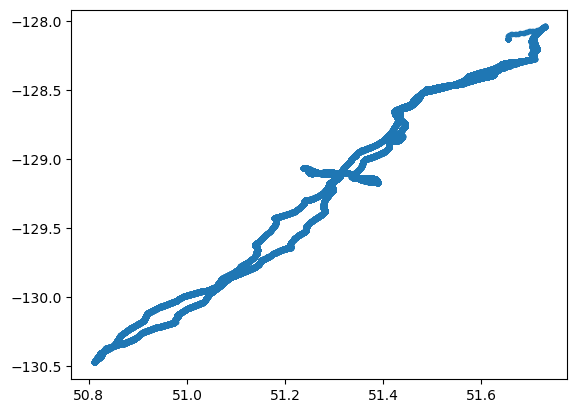

In [4]:
fig, ax = plt.subplots(1, 1) 
ax.plot(ds.latitude, ds.longitude, ".")

and perhaps we want to color those values by the time they were collected. Note first that the `time` variable is a `datetime` object in Python (which has lots of handy features for handling and manipulating dates and times (https://docs.python.org/3/library/datetime.html), so we will use the `to_numpy()` method to convert it to a numpy array which matplotlib is expecting. 

In [5]:
ds.time

<xarray.DataArray 'time' (time: 63306)>
array(['2020-10-06T22:11:54.600999936', '2020-10-06T22:12:24.624000000',
       '2020-10-06T22:12:54.595000064', ..., '2020-10-28T21:58:17.519000064',
       '2020-10-28T21:58:47.535000064', '2020-10-28T21:59:17.542000128'],
      dtype='datetime64[ns]')
Coordinates:
  * time       (time) datetime64[ns] 2020-10-06T22:11:54.600999936 ... 2020-1...
    latitude   (time) float64 51.72 51.72 51.72 51.72 ... 51.65 51.65 51.65
    longitude  (time) float64 -128.1 -128.1 -128.1 ... -128.1 -128.1 -128.1
    depth      (time) float64 ...
Attributes:
    source:            time
    long_name:         Time
    standard_name:     time
    axis:              T
    observation_type:  measured

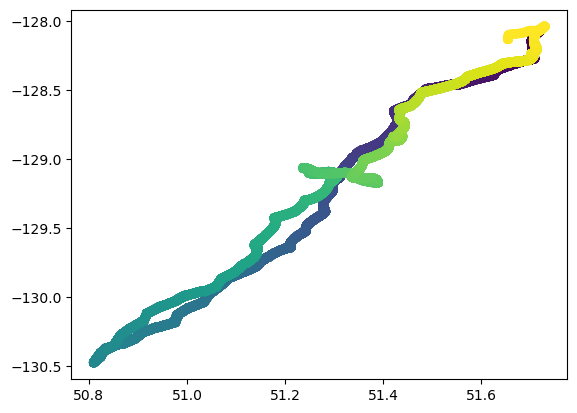

In [6]:
fig, ax = plt.subplots(1, 1) 
ax.scatter(ds.latitude, ds.longitude, c=ds.time.to_numpy())